In [34]:
# Imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import statsmodels.api as sm

#cargamos los datos de entrada
df = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1.csv",sep=",")

## Descripción básica del dataset

In [35]:
df.head(5)

,date,hors,u,v,ws,wd
0,2009070100,1,2.34,-0.79,2.47,108.68
1,2009070100,2,2.18,-0.99,2.40,114.31
2,2009070100,3,2.20,-1.21,2.51,118.71
3,2009070100,4,2.35,-1.40,2.73,120.86
4,2009070100,5,2.53,-1.47,2.93,120.13


## Descripción filas y columnas

In [36]:
#veamos cuantas dimensiones y registros contiene
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (104832, 6)
Nombre columnas: Index(['date', 'hors', 'u', 'v', 'ws', 'wd'], dtype='object')


## Columnas, tipo de datos y nulos

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104832 entries, 0 to 104831
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    104832 non-null  int64  
 1   hors    104832 non-null  int64  
 2   u       93672 non-null   float64
 3   v       93672 non-null   float64
 4   ws      93672 non-null   float64
 5   wd      93672 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 4.8 MB


## Descripción estadística de los datos numéricos

In [38]:
df.describe()

,date,hors,u,v,ws,wd
count,1.048320e+05,104832.000000,93672.000000,93672.00000,93672.000000,93672.000000
mean,2.010559e+09,24.500000,1.598712,-0.09969,4.072487,144.814262
std,9.402333e+05,13.853465,3.052834,2.87600,1.889861,93.518468
min,2.009070e+09,1.000000,-9.240000,-10.85000,0.010000,0.020000
25%,2.010033e+09,12.750000,-0.430000,-2.23000,2.750000,72.920000
50%,2.010123e+09,24.500000,1.890000,-0.17000,3.680000,122.630000
75%,2.011093e+09,36.250000,3.530000,2.06000,5.110000,197.180000
max,2.012063e+09,48.000000,15.250000,10.71000,15.810000,359.990000


### Visualizamos rápidamente las caraterísticas de entrada

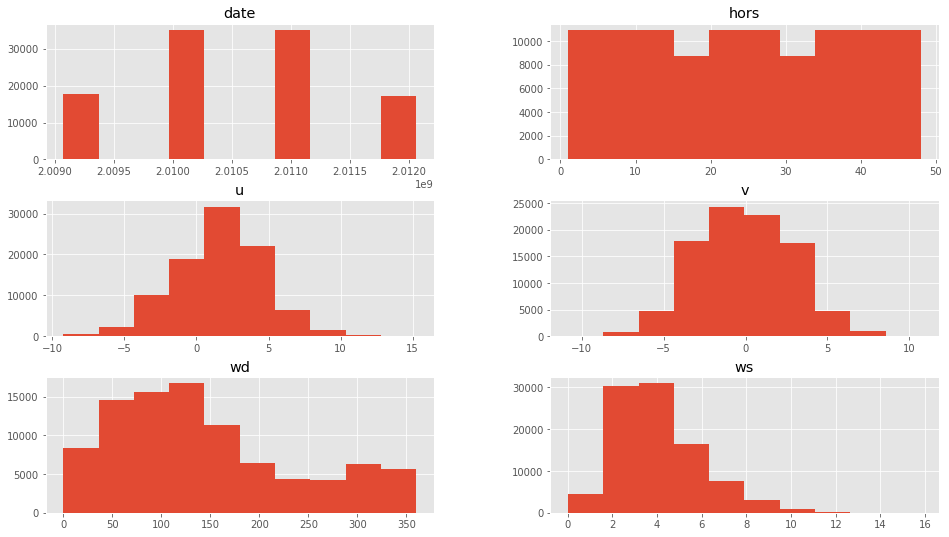

In [39]:
df.hist()
plt.show()

## Correlación entre variables

In [40]:
df.corr(method='pearson')

,date,hors,u,v,ws,wd
date,1.000000,0.000000,0.016221,-0.001918,-0.000841,-0.025452
hors,0.000000,1.000000,-0.007483,0.010129,-0.017601,-0.006819
u,0.016221,-0.007483,1.000000,-0.041353,0.431726,-0.691513
v,-0.001918,0.010129,-0.041353,1.000000,0.009221,-0.125260
ws,-0.000841,-0.017601,0.431726,0.009221,1.000000,-0.159404
wd,-0.025452,-0.006819,-0.691513,-0.125260,-0.159404,1.000000


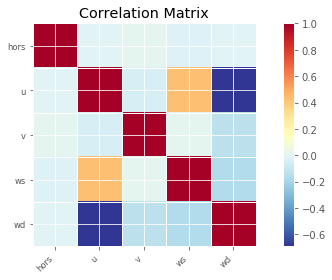

In [47]:
corr = df.set_index('date').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.rcParams['figure.figsize'] = (9, 4)
plt.show()

Text(0, 0.5, 'ws')

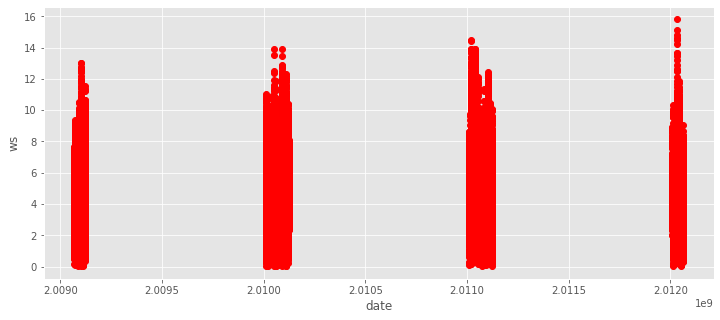

In [25]:
plt.plot(df.date, df.ws, "ro")
plt.xlabel("date")
plt.ylabel("ws")

## Outliers

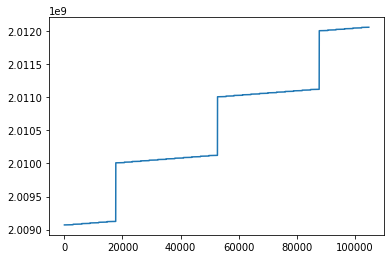

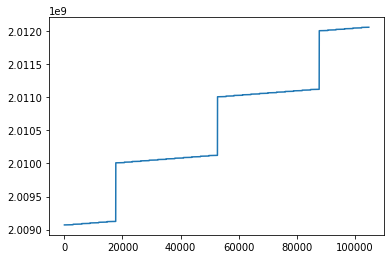

In [75]:
df.date.plot().get_figure()

In [83]:
def remov_outliers(y):
    #y = data['date']
    removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
    print(str(y[removed_outliers].size) + "/" + str(y.size) + " data points remain.") 
    print(removed_outliers.value_counts())
    
    return removed_outliers

94368/104832 data points remain.
True     94368
False    10464
Name: date, dtype: int64


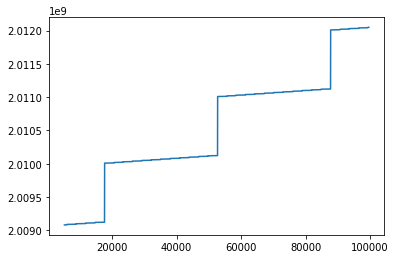

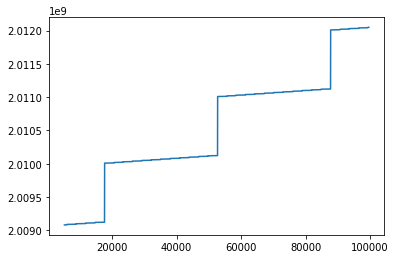

In [84]:
removed_outliers = remov_outliers(df['date'])

y[removed_outliers].plot().get_figure()